In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
import pandas as pd
data=pd.read_csv("emails.csv")

In [ ]:
data["Email No."] = data.index + 1
data.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X=data.iloc[:,:-1]
print(X.head(1))
print(X.shape)

   Email No.  the  to  ect  and  for  of  a  you  hou  ...  enhancements  \
0          1    0   0    1    0    0   0  2    0    0  ...             0   

   connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
0         0    0       0    0               0         0         0   0    0  

[1 rows x 3001 columns]
(5172, 3001)


In [ ]:
Y=data.iloc[:,-1:]
print(Y.head(5))
print(Y.shape)

   Prediction
0           0
1           0
2           0
3           0
4           0
(5172, 1)


In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
 
#Load Data

pca = PCA(3)
 
#Transform the data
data_PCA = pca.fit_transform(data)
 
data_PCA.shape

(5172, 3)

## Apply K-Means to the Data

In [ ]:
N_Clusters=4

In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data_PCA)

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= N_Clusters)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data_PCA)
 
print(label)

[0 0 0 ... 2 2 2]


## Plotting Label 0 K-Means Clusters

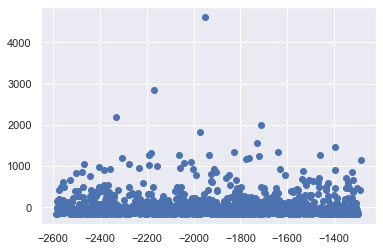

In [ ]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = data_PCA[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

## Plotting Additional K-Means Clusters

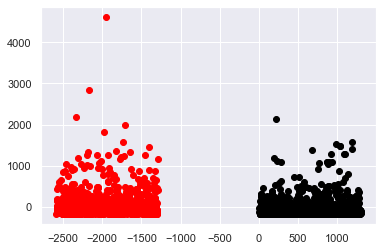

In [ ]:

#filter rows of original data
filtered_label0 = data_PCA[label == 0]
 
filtered_label1 = data_PCA[label == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

## Plot All K-Means Clusters

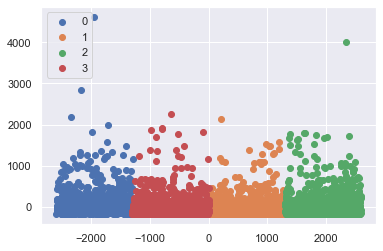

In [ ]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data_PCA[label == i , 0] , data_PCA[label == i , 1] , label = i)
plt.legend()
plt.show()

## Plotting the Cluster Centroids

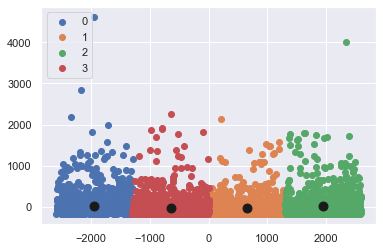

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data_PCA[label == i , 0] , data_PCA[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
Weights=centroids
print(data_PCA)
print('\n***************************************************\n')
print(Weights)

[[-2.58588923e+03 -1.65318953e+02 -4.81426290e+00]
 [-2.58421379e+03  1.53262204e+02  2.76099954e+01]
 [-2.58386225e+03 -1.58299380e+02 -5.06557404e+00]
 ...
 [ 2.58314056e+03 -1.57310831e+02  1.38917482e+00]
 [ 2.58435792e+03 -6.71591480e+01 -7.14727692e+00]
 [ 2.58605578e+03  2.25206191e+02  1.00673348e+00]]

***************************************************

[[-1.94193271e+03  2.53194352e+01 -1.49300486e+00]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]


In [ ]:
len ( Weights )

4

In [ ]:
def winner_cluster_per_point( weights, sample  , index) :
    dist_point_clust={}
 
    for i in range(len(weights)):
        dist_point_clust[i]=sum(( weights[i] - sample[index] )**2)
        winner_clust=min(dist_point_clust.items(), key=lambda x: x[1]) 
    return winner_clust[0]

In [ ]:
def update_weights_for_Neighbors (neighbor_1 ,neighbor_2 ,  weights, sample, winner, alpha ):
    if winner==neighbor_1 or winner==neighbor_2:
         for i in range( len ( weights[0] )):
            weights[neighbor_1][i] = weights[neighbor_1][i] + alpha * ( sample[i] - weights[neighbor_1][i] )
            weights[neighbor_2][i] = weights[neighbor_2][i] + alpha * ( sample[i] - weights[neighbor_2][i] )       
    else :
        for i in range( len ( weights[0] ) ):
            weights[winner][i] = weights[winner][i] + alpha * ( sample[i] - weights[winner][i] )
        
    return weights

In [ ]:

for n in range(len(data_PCA)):
    ii=0
    jj=0
    if N_Clusters == 2:
        nn = winner_cluster_per_point(Weights,data_PCA,n)
        print("winner : " ,nn+1)
        Weights = update_weights_for_Neighbors (0 ,1 , Weights,data_PCA[n],nn,0.9 )
        print(Weights)
        print("\n*******************************************************\n")
    else:
        # start neighbor
        minn=100000
        for i in range(len(Weights)):
            for j in range(len(Weights)):
                if i != (j+1) and i<(j+1) and j<2:
                    xx=sum((np.subtract( Weights[i] , Weights[j+1] ))**2)
                    if (minn>xx):
                        minn=xx
                        #index=[]
                        ii=(i)  
                        jj=(j+1)

        # end neighbor   
        #print("neighbors : " ,index)
        print(ii+1 , jj+1)
        nn = winner_cluster_per_point(Weights,data_PCA,n)
        print("winner : " ,nn+1)
        Weights = update_weights_for_Neighbors (ii ,jj , Weights,data_PCA[n],nn,0.9 )
        print(Weights)
        print("\n*******************************************************\n")

1 1
winner :  1
[[-2.57944967e+03 -1.63412570e+02 -4.78105032e+00]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.58416615e+03  1.50095456e+02  2.72860849e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.58386529e+03 -1.55215431e+02 -4.74205745e+00]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.58266931e+03 -2.24762137e+01  3.08634756e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852

winner :  1
[[-2.52049112e+03 -5.75543963e+00 -1.92180457e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.51988235e+03 -1.57500825e+02 -3.75748123e+00]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.51825060e+03  1.33996283e+02  1.50743438e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.51763749e+03 -4.64133789e+01  6.13802672e+00]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00

winner :  1
[[-2.44662320e+03 -4.93415389e+01 -2.07154842e+00]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.44391914e+03  7.49100047e+02  2.87549750e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.44400083e+03  2.67992233e+02  1.45603260e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.44364750e+03 -4.00408499e+01  8.04494776e+00]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00

 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.35881618e+03 -1.22106152e+02  1.16852766e+00]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.35782660e+03 -1.32765176e+02  3.03001689e+00]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.35600562e+03  2.19647142e+02  3.23156098e+00]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.45559820e+02 -1.56634453e+01  2.08805958e+00]]

*******************************************************

1 1
winner :  1
[[-2.35578527e+03 -1.19677104e+02 -3.

 [-2.27395610e+03 -1.30484513e+02  2.51948332e+00]]

*******************************************************

1 1
winner :  4
[[-2.27472503e+03  3.11281199e+02 -2.82278741e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.27296423e+03 -1.46901031e+02 -1.95882602e+00]]

*******************************************************

1 1
winner :  4
[[-2.27472503e+03  3.11281199e+02 -2.82278741e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.27180995e+03 -9.11966942e+01 -1.31872097e+01]]

*******************************************************

1 1
winner :  4
[[-2.27472503e+03  3.11281199e+02 -2.82278741e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.27078309e+03 -7.83681530e+01 -1.29344079e+01]]

*******************************************************

1 1
winner :  4
[[-2.27472503e+03  3.11281199e+02 -2.

 [-2.19174570e+03 -5.09744008e+01 -3.18504569e+00]]

*******************************************************

1 1
winner :  4
[[-2.19229769e+03  1.01957958e+03  3.62313611e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.19090642e+03 -1.27212953e+02 -9.04127623e+00]]

*******************************************************

1 1
winner :  4
[[-2.19229769e+03  1.01957958e+03  3.62313611e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.18985665e+03 -1.06308756e+02 -6.03029717e-01]]

*******************************************************

1 1
winner :  4
[[-2.19229769e+03  1.01957958e+03  3.62313611e+01]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.18888976e+03 -1.16523873e+02 -3.39177151e+00]]

*******************************************************

1 1
winner :  4
[[-2.19229769e+03  1.01957958e+03  3.

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.12696166e+03 -1.45492188e+02 -2.00651517e-01]]

*******************************************************

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.12588646e+03 -1.16169605e+02  2.04150775e+00]]

*******************************************************

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.12460120e+03  2.50911190e+00 -5.37086420e+00]]

*******************************************************

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.09083466e+03 -9.35350017e+01  3.05961523e+00]]

*******************************************************

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.08992867e+03 -1.35561284e+02 -1.73653240e+00]]

*******************************************************

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.08893590e+03 -1.36658741e+02  2.26399850e+00]]

*******************************************************

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852


1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.03074190e+03 -5.05287999e+01  6.02065195e+00]]

*******************************************************

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.02987411e+03 -1.14720139e+02 -4.91326937e+00]]

*******************************************************

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.02882850e+03 -9.67037724e+01 -4.44696496e+00]]

*******************************************************

1 1
winner :  4
[[-2.16735871e+03  2.82382145e+03 -2.86152169e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.2827385

winner :  4
[[-1.97489279e+03  1.83918845e+03 -1.60198899e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.97693133e+03 -9.60987538e+01  4.98310845e+00]]

*******************************************************

1 1
winner :  4
[[-1.97489279e+03  1.83918845e+03 -1.60198899e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.97596053e+03 -1.47685233e+02 -2.41482188e+00]]

*******************************************************

1 1
winner :  4
[[-1.97489279e+03  1.83918845e+03 -1.60198899e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.97472269e+03 -5.25489781e+01 -7.60722043e+00]]

*******************************************************

1 1
winner :  4
[[-1.97489279e+03  1.83918845e+03 -1.60198899e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00


*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.91889775e+03 -1.21107596e+02 -1.43053326e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.91791871e+03 -1.27822125e+02  8.35533664e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.91481448e+03  8.28813892e+02  1.16094144e+02]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.5

 [-1.86473972e+03 -6.08372376e+01 -1.07377795e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.86375070e+03 -6.11260076e+01 -6.77058513e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.86295100e+03 -1.46898139e+02 -5.74604981e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.86199588e+03 -1.64580396e+02 -4.33316124e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.

 [-1.82194809e+03 -1.45009809e+02 -5.82687582e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.81943141e+03  5.88400338e+02  5.83515954e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.81984670e+03 -8.92172390e+01  5.42607334e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.81879023e+03 -8.13365462e+01 -7.35385402e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.

 [-1.75976072e+03 -6.32869446e+01 -2.31444646e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.75844086e+03  6.73845103e+01 -2.81411325e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.75787080e+03 -1.13141531e+02 -2.75770600e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.75604034e+03  2.11654527e+02 -1.73074276e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.

 [-1.72784192e+03 -9.90031103e+01 -6.39628240e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.72681490e+03 -8.85767524e+01 -7.35628770e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.72592546e+03 -1.35270802e+02 -4.91302154e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.72499647e+03 -1.61713840e+02 -2.07793614e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.

 [-1.66012038e+03  2.39849365e+02  1.15376826e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.65923293e+03  1.72714245e+02 -2.87841178e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.65851746e+03  3.91090330e+01 -4.85083306e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.65764422e+03 -2.01752442e+01 -1.27936871e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.

 [-1.55652981e+03  4.04554847e+01 -1.05264877e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.55475854e+03  3.71317937e+02  3.67635382e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.55482488e+03 -9.40768997e+01 -3.17234476e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.55343251e+03  7.89124424e+01  8.93265657e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.

[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.50467189e+03 -3.01685616e+01 -5.17689239e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.50310132e+03  2.30883065e+02 -5.26206054e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.50187704e+03  2.86462255e+02 -8.77824242e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.50091


1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.44732895e+03  1.22139163e+02 -2.10779942e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.44680572e+03 -8.10860925e+01 -2.19271768e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.44597923e+03 -1.55165504e+02 -7.45829371e-01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.2827385

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.36500225e+03 -1.64705419e+02 -1.21159526e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.36359906e+03  2.12972051e+01  1.78884425e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.36276402e+03 -6.62190495e+01 -2.76663986e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852

 [-1.30067438e+03 -2.09386764e+01 -1.79536358e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.29998307e+03 -1.57372714e+02 -2.75609940e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.29896306e+03 -1.48975036e+02 -2.04993350e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.29797835e+03 -1.56113324e+02 -2.42337135e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.21787532e+03 -1.09001140e+02  1.41061536e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.21691727e+03 -1.30737763e+02  1.80129645e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.21566189e+03 -2.13446700e+01 -8.50891970e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852


*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.14281769e+03 -9.19570101e+01 -7.05027337e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.14151291e+03  5.82535450e+01  3.54439635e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.14008247e+03  2.65201328e+02  1.41244895e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.5

 [-1.07357610e+03  1.73868078e+01 -3.21540835e-01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.07293102e+03 -1.35021389e+02 -9.52286098e-01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.07171717e+03 -2.67838054e+01  2.70855799e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.07069584e+03 -1.99155752e+01  1.46956575e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-9.84296173e+02  6.03361338e+02  5.32253833e+00]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-9.84486263e+02  5.87561972e+01 -3.58826180e-01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-9.83955921e+02 -1.44260063e+02 -3.85906062e-01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 6.54923667e+02 -3.17162445e+01  6.51100335e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852

winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-8.87835415e+02 -8.86493478e+01 -9.80475728e-02]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-8.93830786e+02  1.16956694e+03 -4.87717372e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-8.86868898e+02 -1.06115027e+02 -3.86815850e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-8.93830786e+02  1.16956694e+03 -4.87717372e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-8.85943083e+02 -1.41761559e+02 -4.66394544e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-8.93830786e+02  1.16956694e+03 -4.87717372e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-8.85002152e+02 -1.64523262e+02 -6.65789493e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-7.96560057e+02  3.73121637e+01  2.49964452e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-7.90863939e+02  1.88753029e+03  2.20698173e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-7.93795920e+02  2.92364530e+01  3.19849457e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-7.90863939e+02  1.88753029e+03  2.20698173e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-7.92870354e+02 -1.05157429e+02 -5.21249578e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-7.90863939e+02  1.88753029e+03  2.20698173e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-7.90210023e+02  5.73083448e+02 -2.29652106e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852

winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-7.05778985e+02 -7.54706858e+01 -5.41626754e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-7.90863939e+02  1.88753029e+03  2.20698173e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-7.04985141e+02 -1.58870563e+02 -3.28122443e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-7.90863939e+02  1.88753029e+03  2.20698173e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-7.04003255e+02 -1.65617759e+02 -7.29881338e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-7.90863939e+02  1.88753029e+03  2.20698173e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-7.02409500e+02  1.21690309e+02  2.14841852e+01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00

winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-6.15965899e+02 -1.53607698e+02 -2.59293881e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.59945107e+02  2.22568733e+03  2.07674950e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-6.14944114e+02 -1.45034860e+02 -4.21059646e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.59945107e+02  2.22568733e+03  2.07674950e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-6.13832524e+02 -9.59667915e+01 -7.50762641e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.59945107e+02  2.22568733e+03  2.07674950e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-6.12795054e+02 -7.41717334e+01  8.03503503e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00

 [-6.59945107e+02  2.22568733e+03  2.07674950e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-5.58985898e+02 -1.59681102e+02 -9.16763269e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.59945107e+02  2.22568733e+03  2.07674950e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-5.57696319e+02 -1.47444311e+01  1.37352681e+01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-6.59945107e+02  2.22568733e+03  2.07674950e+02]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-5.57696319e+02 -1.47444311e+01  1.37352681e+01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-5.63709272e+02  1.46970818e+03 -7.93415081e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-5.17995992e+02 -1.61612225e+02  1.33952394e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-5.20131903e+02  1.27953124e+03 -6.64702447e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-5.16644650e+02  8.90700228e+00  6.31761752e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-5.20131903e+02  1.27953124e+03 -6.64702447e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-5.15884009e+02 -1.09835851e+02 -5.72248429e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-5.20131903e+02  1.27953124e+03 -6.64702447e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-5.14888508e+02 -1.20804511e+02 -1.99831828e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852

 [-5.20131903e+02  1.27953124e+03 -6.64702447e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-4.80961437e+02 -1.46199230e+02  1.23967144e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-5.20131903e+02  1.27953124e+03 -6.64702447e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-4.79993459e+02 -1.60429580e+02  1.52133127e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-5.20131903e+02  1.27953124e+03 -6.64702447e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-4.78958234e+02 -1.48372001e+02 -1.79275603e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-5.20131903e+02  1.27953124e+03 -6.64702447e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.

 [-4.25329494e+02  1.44538997e+03 -2.87661222e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-3.80733727e+02 -5.11340318e+01 -5.68231710e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-4.25329494e+02  1.44538997e+03 -2.87661222e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-3.79908896e+02 -1.23698195e+02  1.59944255e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-4.25329494e+02  1.44538997e+03 -2.87661222e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-3.78569286e+02  3.15940186e+01 -1.03118078e+01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-4.25329494e+02  1.44538997e+03 -2.87661222e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.

winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-2.83955671e+02 -1.44845589e+02  1.07133862e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.82663084e+02  9.18350128e+02 -2.00457244e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-2.81988243e+02 -1.20767219e+02 -6.10578619e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.82663084e+02  9.18350128e+02 -2.00457244e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-2.80591388e+02  2.12240556e+01  2.95520347e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.82663084e+02  9.18350128e+02 -2.00457244e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-2.79958559e+02 -1.43261631e+02  2.21369108e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00

winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-1.99842563e+02 -9.49376879e+01  1.44328629e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.82663084e+02  9.18350128e+02 -2.00457244e+01]]

*******************************************************

1 1
winner :  4
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-1.99842563e+02 -9.49376879e+01  1.44328629e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.05954229e+02  4.76952223e+02 -2.73531342e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-1.97841158e+02 -5.36213081e+01 -4.36449498e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.05954229e+02  4.76952223e+02 -2.73531342e+01]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-1.96728860e+02 -4.74615354e+01  2.47558067e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00


*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-1.15412415e+02  1.10745312e+02 -1.54193797e+01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.17695029e+02  4.20469110e+02  1.33366795e+00]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-1.14867176e+02 -1.08569627e+02 -1.11604979e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.17695029e+02  4.20469110e+02  1.33366795e+00]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-1.13837476e+02 -9.35720127e+01 -4.35169561e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-1.17695029e+02  4.20469110e+02  1.33366795e+00]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-1.12867817e+02 -1.13733898e+02 -6.1

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-3.28029897e+01 -8.20247990e+01 -1.57225016e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-9.98200383e+01  1.68064403e+03 -1.48421131e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-3.19302483e+01 -1.31253996e+02  1.42602640e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-9.98200383e+01  1.68064403e+03 -1.48421131e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-3.04304365e+01  7.11386522e+01 -1.18833964e+01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-9.98200383e+01  1.68064403e+03 -1.48421131e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [-2.96304500e+01  4.01226316e+00  1.79435272e+01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852

winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 5.02321117e+01 -6.16405139e+01  3.12148078e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.57580972e+01  1.22373957e+03 -1.13027072e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 5.11108529e+01 -1.20664118e+02  2.38966763e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.57580972e+01  1.22373957e+03 -1.13027072e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 5.26574879e+01  1.03376549e+02 -8.17956589e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.57580972e+01  1.22373957e+03 -1.13027072e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 5.33650621e+01  1.56610399e+01  1.33642478e+01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00

winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 1.33102521e+02 -1.21353039e+02  1.30719048e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.57580972e+01  1.22373957e+03 -1.13027072e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 1.34022189e+02 -1.53103877e+02  1.68736789e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.57580972e+01  1.22373957e+03 -1.13027072e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 1.34980374e+02 -1.73030305e+02  9.22432693e-01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [-2.57580972e+01  1.22373957e+03 -1.13027072e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 1.35989438e+02 -1.68392920e+02  1.25815127e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00


*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 2.17609178e+02  1.33733265e+02  2.36216343e+01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [ 2.16965392e+02  1.98666065e+03 -1.11287750e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 2.18079739e+02 -1.16346439e+02  1.29730500e+01]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [ 2.16965392e+02  1.98666065e+03 -1.11287750e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 2.18998796e+02 -1.61595135e+02  3.91952858e+00]
 [ 1.94457040e+03  2.25515327e+01 -1.28273852e+00]
 [ 2.16965392e+02  1.98666065e+03 -1.11287750e+02]]

*******************************************************

1 1
winner :  2
[[-1.95077167e+03  4.59086733e+03  6.62475419e+02]
 [ 2.20089985e+02 -1.26258748e+02  6.0

In [ ]:
Weights

In [ ]:
#Getting the Centroids
centroids = Weights
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data_PCA[label == i , 0] , data_PCA[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()